## MNIST Solution

![img](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSttLjW20ZZx1rIQ-IHL_-1mVRh2rfQFtd1EgARFCy95O5jkjV9S-JXp3AcH2zsATuxPaU&usqp=CAU)
> The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits (0-9), split into 60,000 training images and 10,000 testing images.

[Kaggle link](https://www.kaggle.com/datasets/hojjatk/mnist-dataset)

The MNIST dataset is solved using a convolutional neural network (CNN) with data augmentation and hyperparameter tuning.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras import layers
import numpy as np
from sklearn.model_selection import train_test_split

#### Download MNIST Dataset

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

#### Normalizing

In [3]:
x_train_full = (x_train_full / 255.0).astype("float32")[..., None]  # (n, 28, 28, 1)
x_test = (x_test / 255.0).astype("float32")[..., None]

#### Split for training and testing

In [4]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42
)
print(x_train.shape, x_val.shape, x_test.shape)

(54000, 28, 28, 1) (6000, 28, 28, 1) (10000, 28, 28, 1)


#### Build a model

In [5]:
# Augmentation layer for training
data_aug = keras.Sequential(
    [
        layers.RandomRotation(0.05),
        layers.RandomTranslation(0.05, 0.05),
    ],
    name="aug",
)


def build_model(filters=16):
    inp = keras.Input(shape=(28, 28, 1))
    x = data_aug(inp)
    x = layers.Conv2D(filters, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(name="pool1")(x)
    x = layers.Conv2D(filters * 2, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(name="pool2")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    out = layers.Dense(10)(x)
    return (inp, out)


model = keras.Model(*build_model())

In [6]:
model.compile(
    keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ aug (Sequential)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,922 (808.29 KB)

 Trainable params: 206,922 (808.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
hist = model.fit(
    *(x_train, y_train), epochs=3, batch_size=128, validation_data=(x_val, y_val)
)

Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8813 - loss: 0.3950 - val_accuracy: 0.9802 - val_loss: 0.0722
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9638 - loss: 0.1198 - val_accuracy: 0.9823 - val_loss: 0.0544
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9724 - loss: 0.0904 - val_accuracy: 0.9845 - val_loss: 0.0529


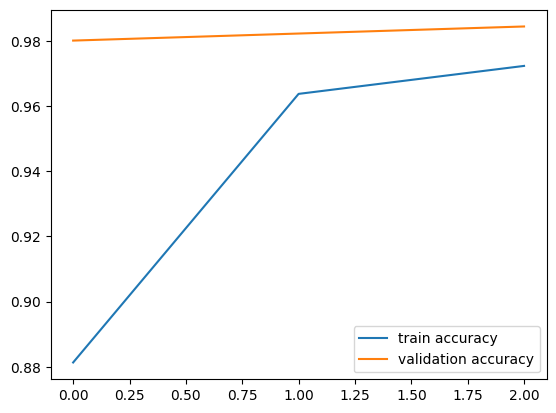

In [8]:
plt.figure()
plt.plot(hist.history["accuracy"], label="train accuracy")
plt.plot(hist.history["val_accuracy"], label="validation accuracy")
plt.legend()

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy: {test_acc * 100:.5f}%, Loss: {test_loss * 100:.5f}%")

Accuracy: 98.39000%, Loss: 4.81700%


## Solution Analysis

#### Plot Wrong preditions

Wrong predictions for 161 images


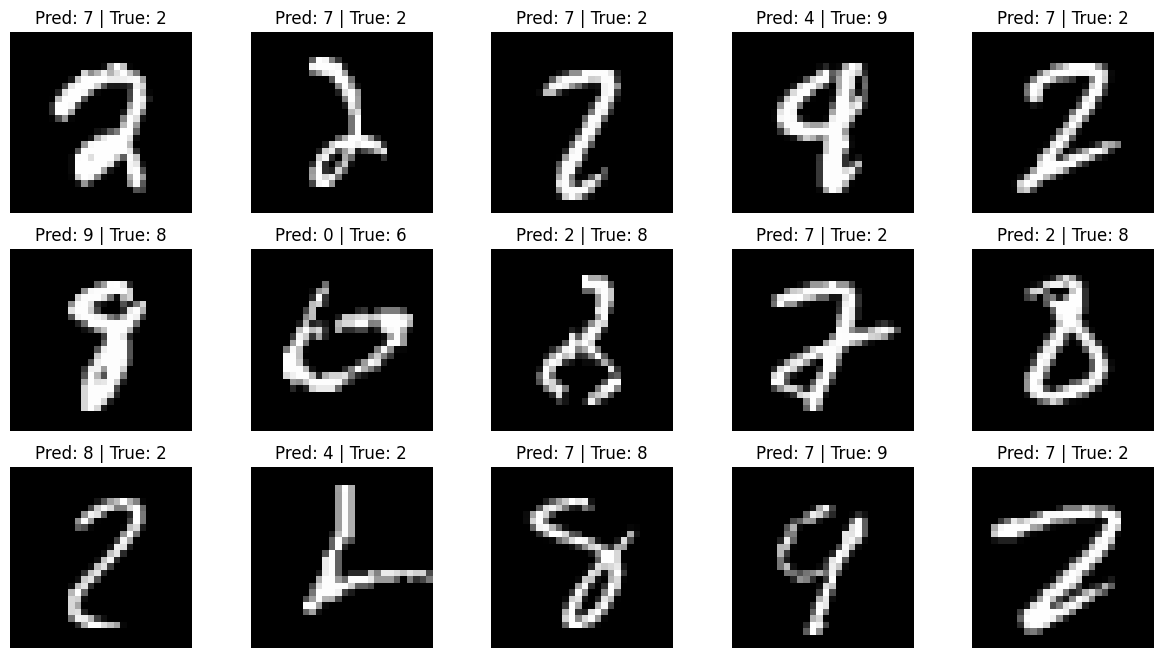

In [10]:
prob = model.predict(x_test, verbose=0)
preds = np.argmax(prob, axis=1)

wrong_idx = np.where(preds != y_test)[0]
print(f"Wrong predictions for {len(wrong_idx)} images")

plot_size = (3, 5)
figsize = (15, 8)
fig, axs = plt.subplots(*plot_size, figsize=figsize)
for i, ax in enumerate(axs.flatten()):
    wrong_index = wrong_idx[i]
    ax.imshow(x_test[wrong_index].squeeze(), cmap="gray")
    ax.set_title(f"Pred: {preds[wrong_index]} | True: {y_test[wrong_index]}")
    ax.axis("off")
plt.show()

#### Pool layers visualisation

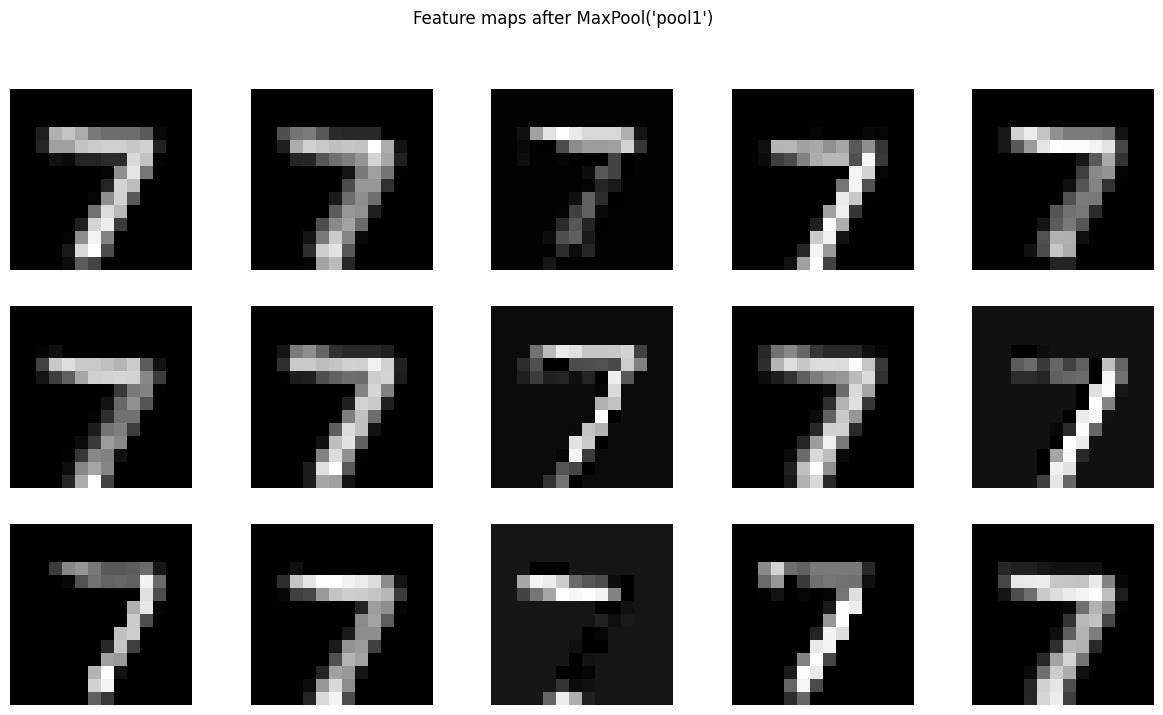

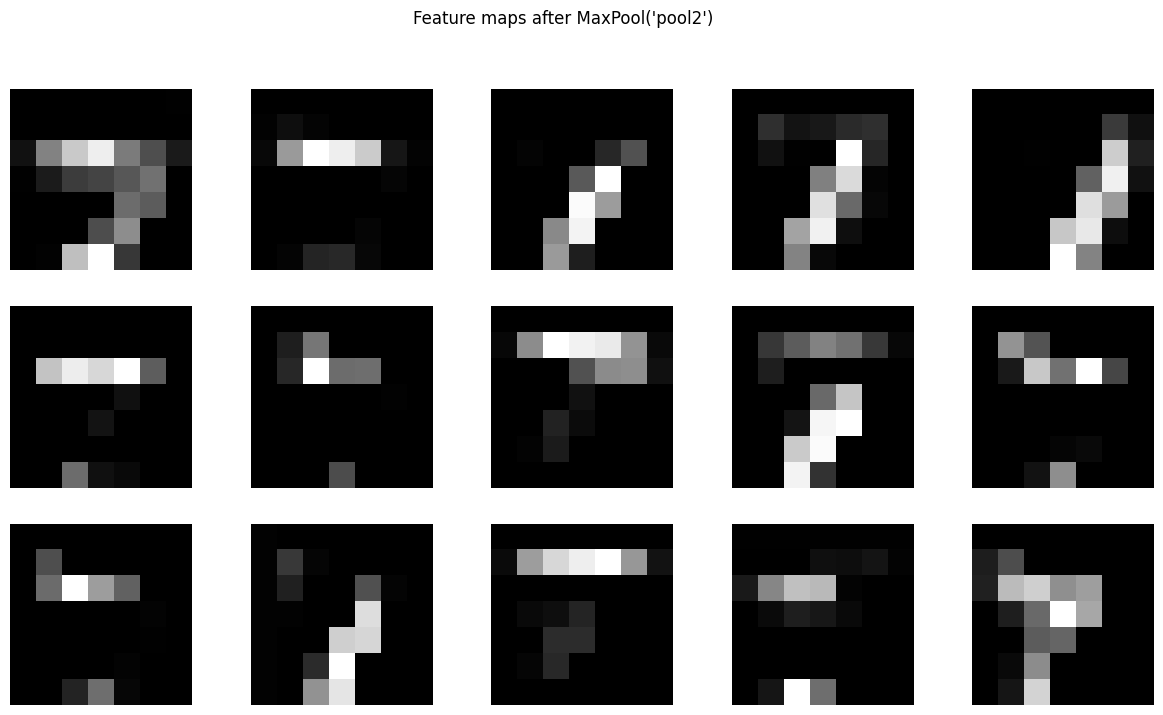

In [11]:
for pool_name in ["pool1", "pool2"]:
    probe = keras.Model(inputs=model.input, outputs=model.get_layer(pool_name).output)

    fig, axs = plt.subplots(*plot_size, figsize=figsize)
    for i, ax in enumerate(axs.flatten()):
        feat = probe.predict(x_test[:1], verbose=0)[0]

        ax.imshow(feat[:, :, i], cmap="gray")
        ax.axis("off")
    fig.suptitle(f"Feature maps after MaxPool('{pool_name}')")
    plt.show()

## Hyper-parameter Tuning

#### Filters enumeration

In [12]:
import pandas as pd

results = []
for filters in [16, 32, 64]:
    tf.keras.backend.clear_session()
    model = keras.Model(*build_model(filters=filters))
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    hist = model.fit(
        *(x_train, y_train), epochs=3, batch_size=128, validation_data=(x_val, y_val)
    )
    val_acc = float(hist.history["val_accuracy"][-1])
    results.append({"filters": filters, "val_acc": val_acc})

df = pd.DataFrame(results).sort_values("val_acc", ascending=False)
print("Validation results:\n", df.to_string(index=False))

Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8912 - loss: 0.3656 - val_accuracy: 0.9740 - val_loss: 0.0826
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9645 - loss: 0.1166 - val_accuracy: 0.9843 - val_loss: 0.0517
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9728 - loss: 0.0879 - val_accuracy: 0.9872 - val_loss: 0.0471
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9059 - loss: 0.3104 - val_accuracy: 0.9823 - val_loss: 0.0599
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9701 - loss: 0.0975 - val_accuracy: 0.9837 - val_loss: 0.0506
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9772 - loss: 0.0728 - val_accuracy: 0.9872 - val_loss: 0.0447
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9236 - loss: 0.2497 - val_accuracy: 0.9853 - val_loss: 0.0502
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 58s 138ms/step - accuracy: 0.9742 - loss: 0.0838 - val_accuracy: 0

#### Train model using one best filter

In [13]:
best_filters = int(df.iloc[0]["filters"])
print(f"\nBest by val_acc: filters={best_filters} → retraining on train set...")
tf.keras.backend.clear_session()
best_model = keras.Model(*build_model(filters=best_filters))
best_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
hist = best_model.fit(
    *(x_train, y_train), epochs=3, batch_size=128, validation_data=(x_val, y_val)
)


Best by val_acc: filters=16 → retraining on train set...
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8899 - loss: 0.3650 - val_accuracy: 0.9783 - val_loss: 0.0691
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9632 - loss: 0.1192 - val_accuracy: 0.9835 - val_loss: 0.0545
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9738 - loss: 0.0866 - val_accuracy: 0.9857 - val_loss: 0.0490


In [14]:
logits = best_model.predict(x_test, verbose=0)
preds = np.argmax(logits, axis=1)

correct_idx = np.where(preds == y_test)[0]
wrong_idx = np.where(preds != y_test)[0]
print(f"Correct: {len(correct_idx)} | Wrong: {len(wrong_idx)} out of {len(x_test)}")


test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy: {test_acc * 100:.5f}%, Loss: {test_loss * 100:.5f}%")

Correct: 9880 | Wrong: 120 out of 10000
Accuracy: 98.80000%, Loss: 3.53537%


Wrong predictions for 120 images


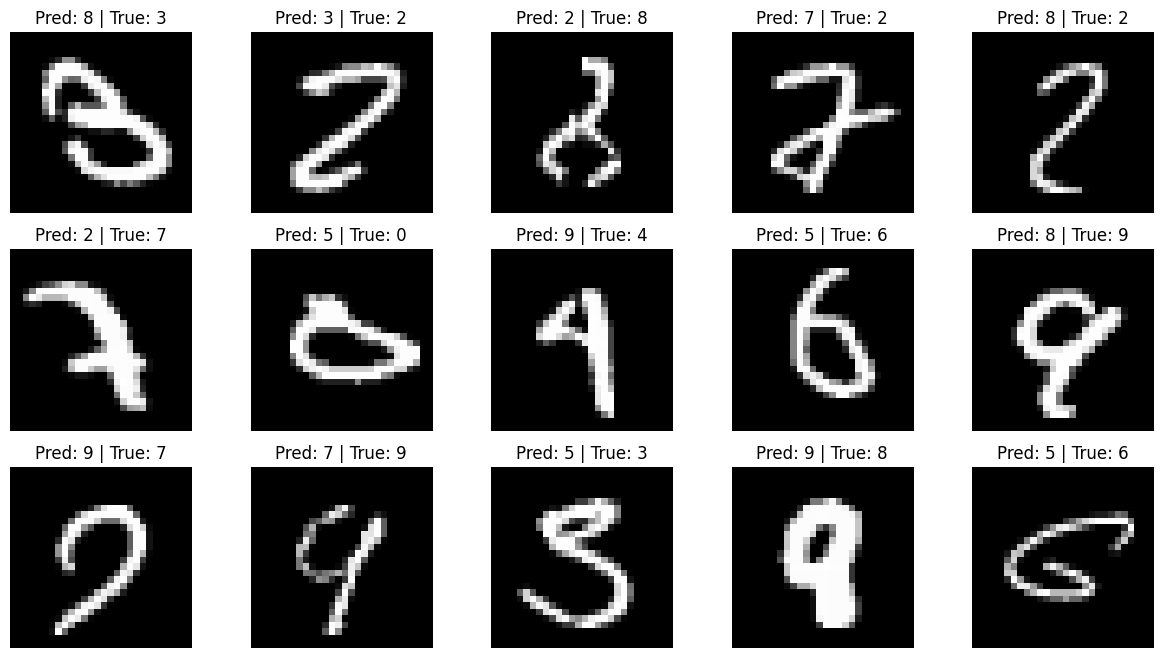

In [15]:
prob = best_model.predict(x_test, verbose=0)
preds = np.argmax(prob, axis=1)

wrong_idx = np.where(preds != y_test)[0]
print(f"Wrong predictions for {len(wrong_idx)} images")

plot_size = (3, 5)
figsize = (15, 8)
fig, axs = plt.subplots(*plot_size, figsize=figsize)
for i, ax in enumerate(axs.flatten()):
    wrong_index = wrong_idx[i]
    ax.imshow(x_test[wrong_index].squeeze(), cmap="gray")
    ax.set_title(f"Pred: {preds[wrong_index]} | True: {y_test[wrong_index]}")
    ax.axis("off")
plt.show()